use the attributes from correlation:choose the most related 20 features,which are:

89,176,13,244,0,105,17,226,272,101,164,114,289,30,201,199,183,24,65,33

In [20]:
#import models
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#load data
def loadDataSet(fileName,fromLine,toLine,avoidFrom=0,avoidTo=0,ifPreprocess=False,ifNormalize=False):
    dataMat=[]
    labelMat=[]
    inFile=open(fileName)
    inFile.readline()
    lineNumber=0
    for line in inFile.readlines():
        if(avoidFrom!=avoidTo):
            if((lineNumber<=toLine and lineNumber>=fromLine) and (lineNumber<avoidFrom or lineNumber>avoidTo)):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber>toLine):
                break
            else:
                lineNumber+=1
                continue
        else:
            if(lineNumber<=toLine and lineNumber>=fromLine):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber<toLine):
                lineNumber+=1
                continue
            else:
                break
    if(ifPreprocess):
        dataMat=preprocessing.scale(dataMat)
    if(ifNormalize):
        normalizer = preprocessing.Normalizer().fit(dataMat)
        dataMat=normalizer.transform(dataMat)
    return dataMat,labelMat

In [166]:
#use linear model first
#In the linear model,we only need to change the C,which shows the Regularization
#set the trainTime as 20
def linearSVM(trainTime):
    testSize=50
    testRange=list(range(0,250,testSize))
    Clist=list(np.arange(0.001,1,0.1))
    scoreList=[]
    for thisC in Clist:
        count=0
        score=0
        for i in range(trainTime):
            for begin in testRange:
                count+=1
                X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
                Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
                clf_linear=SVC(kernel='linear',C=thisC)
                clf_linear.fit(X,y)
                score+=clf_linear.score(Xtest,ytest)
        score=score/count
        scoreList.append(score)
    #draw the relation between C and the accuracy
    %matplotlib inline
    plt.plot(Clist,scoreList)
    plt.xlabel('C')
    plt.ylabel('accuracy')

In [172]:
testSize=50
testRange=list(range(0,250,testSize))
scoreList=[]
for begin in testRange:
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
    clf_rbf=SVC(kernel='linear',C=0.38)
    clf_rbf.fit(X,y)
    score=clf_rbf.score(Xtest,ytest)
    scoreList.append(score)
print(scoreList)

[0.7647058823529411, 0.7450980392156863, 0.7058823529411765, 0.803921568627451, 0.72]


In [177]:
part=3
testSize=50
begin=(part-1)*50
X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
clf_rbf=SVC(kernel='linear',C=0.38)
clf_rbf.fit(X,y)
ypredict=clf_rbf.predict(Xtest)
size=np.size(ypredict)
print("real y,predict y")
for i in range(size):
    print(ytest[i],",",ypredict[i])

real y,predict y
1.0 , 0.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 1.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 0.0
0.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 0.0
0.0 , 1.0
1.0 , 1.0
0.0 , 0.0


In [178]:
XfinalTest=loadTestData('testSelect5features.csv')
yfinalTest=clf_rbf.predict(XfinalTest)
writeTestData("submissionLinear_part3_5features.csv",yfinalTest)

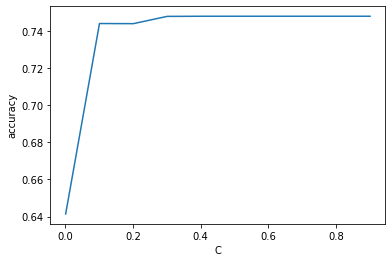

In [167]:
linearSVM(1)

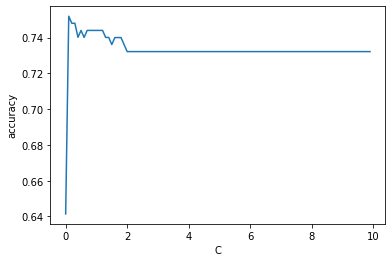

In [31]:
#now we see what will happen when we train multiple times
linearSVM(2)

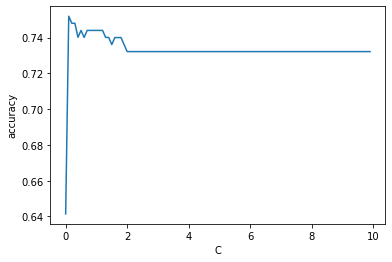

In [32]:
linearSVM(3)

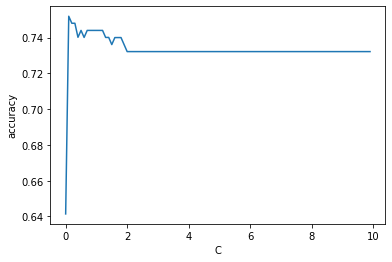

In [33]:
linearSVM(10)

so forget it,it makes no different for linear model

Then we choose poly kernel:

In [179]:
#use poly kernel
def polySVM(thisDegree=3,thisGamma='auto',thisCoef0=1,thisC=1,trainTime=1):
    testSize=50
    testRange=list(range(0,250,testSize))
    count=0
    score=0
    for i in range(trainTime):
        for begin in testRange:
            count+=1
            X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
            Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
            clf_poly=SVC(kernel='poly',C=thisC,degree=thisDegree,coef0=thisCoef0,gamma=thisGamma)
            clf_poly.fit(X,y)
            score+=clf_poly.score(Xtest,ytest)
    score=score/count
    return score

Text(0, 0.5, 'Score')

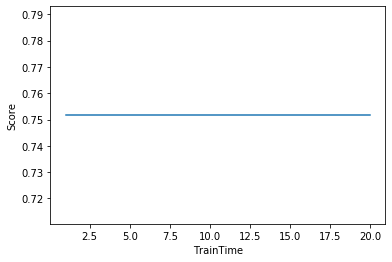

In [180]:
#test the accuracy when trainTime is changed
trainTime=list(range(1,21,1))
scoreList=[]
for i in trainTime:
    scoreList.append(polySVM(trainTime=i))
%matplotlib inline
plt.plot(trainTime,scoreList)
plt.xlabel('TrainTime')
plt.ylabel('Score')

So we can see it still makes no difference for mutiple trainings

Now we change the degree:

Text(0, 0.5, 'Score')

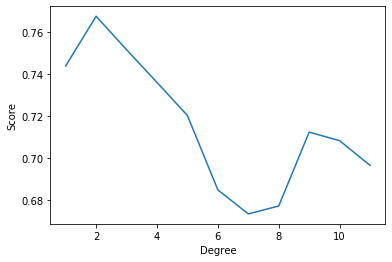

In [181]:
#test the accuracy when degree is changed
degree=[1,2,3,4,5,6,7,8,9,10,11]
scoreList=[]
for i in degree:
    scoreList.append(polySVM(thisDegree=i))
%matplotlib inline
plt.plot(degree,scoreList)
plt.xlabel('Degree')
plt.ylabel('Score')

now we know it's different when degree changes

now we test coef0

Text(0, 0.5, 'Score')

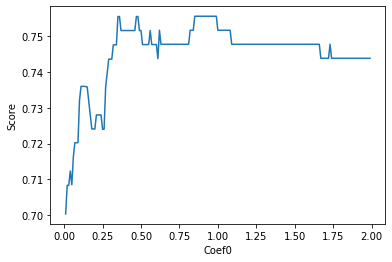

In [187]:
#test the accuracy when coef0 is changed
coef0List=list(np.arange(0.01,2,0.01))
scoreList=[]
for i in coef0List:
    scoreList.append(polySVM(thisCoef0=i))
%matplotlib inline
plt.plot(coef0List,scoreList)
plt.xlabel('Coef0')
plt.ylabel('Score')

now we test C:

Text(0, 0.5, 'Score')

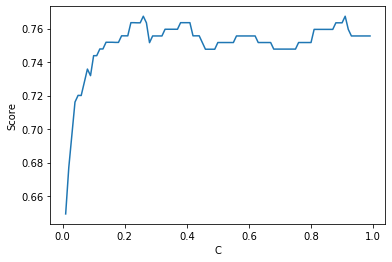

In [186]:
#test the accuracy when C is changed
cList=list(np.arange(0.01,1,0.01))
scoreList=[]
for i in cList:
    scoreList.append(polySVM(thisC=i))
%matplotlib inline
plt.plot(cList,scoreList)
plt.xlabel('C')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

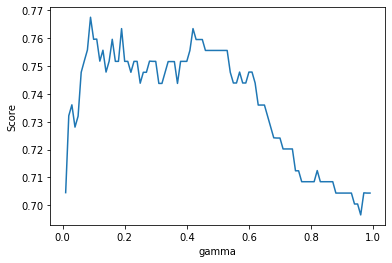

In [190]:
#test the accuracy when gamma is changed
gammaList=list(np.arange(0.01,1,0.01))
scoreList=[]
for i in gammaList:
    scoreList.append(polySVM(thisGamma=i))
%matplotlib inline
plt.plot(gammaList,scoreList)
plt.xlabel('gamma')
plt.ylabel('Score')

In [197]:
part=4
testSize=50
begin=(part-1)*50
X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
clf_rbf=SVC(kernel='poly',degree=4,gamma=0.1,C=2,coef0=1)
clf_rbf.fit(X,y)
ypredict=clf_rbf.predict(Xtest)
size=np.size(ypredict)
print("real y,predict y")
for i in range(size):
    print(ytest[i],",",ypredict[i])

real y,predict y
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
0.0 , 0.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 1.0
1.0 , 0.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0


In [198]:
XfinalTest=loadTestData('testSelect5features.csv')
yfinalTest=clf_rbf.predict(XfinalTest)
writeTestData("submissionPoly_part4_5features_4degree.csv",yfinalTest)

test a new kernel

In [50]:
def anyKindSVM(thisKernel='poly',thisDegree=3,thisGamma='auto',thisCoef0=1,thisC=1,trainTime=1):
    testSize=50
    testRange=list(range(0,250,testSize))
    count=0
    score=0
    for i in range(trainTime):
        for begin in testRange:
            count+=1
            X,y=loadDataSet("mostRelated20Features.csv",0,249,begin,begin+testSize)
            Xtest,ytest=loadDataSet("mostRelated20Features.csv",begin,begin+testSize)
            clf_poly=SVC(kernel=thisKernel,C=thisC,degree=thisDegree,coef0=thisCoef0,gamma=thisGamma)
            clf_poly.fit(X,y)
            score+=clf_poly.score(Xtest,ytest)
    score=score/count
    return score

In [51]:
anyKindSVM(thisKernel='rbf')

0.7674509803921568

In [52]:
anyKindSVM(thisKernel='sigmoid')

0.7247058823529413

In [54]:
anyKindSVM(thisKernel='poly')

0.7163921568627452

it seems that rbf has the best performs,let's test it:

1. test gamma

Text(0, 0.5, 'Score')

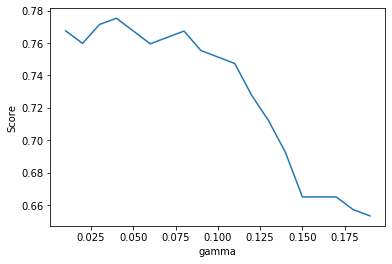

In [67]:
#test the accuracy when gamma is changed
gammaList=list(np.arange(0.01,0.2,0.01))
scoreList=[]
for i in gammaList:
    scoreList.append(anyKindSVM(thisGamma=i,thisKernel='rbf'))
%matplotlib inline
plt.plot(gammaList,scoreList)
plt.xlabel('gamma')
plt.ylabel('Score')

test coef0:

Text(0, 0.5, 'Score')

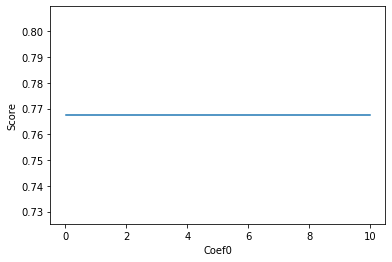

In [60]:
#test the accuracy when coef0 is changed
coef0List=list(np.arange(0.01,10,0.01))
scoreList=[]
for i in coef0List:
    scoreList.append(anyKindSVM(thisKernel='rbf',thisCoef0=i))
%matplotlib inline
plt.plot(coef0List,scoreList)
plt.xlabel('Coef0')
plt.ylabel('Score')

it seems rbf method doesn't use coef0.233333

Test C:

Text(0, 0.5, 'Score')

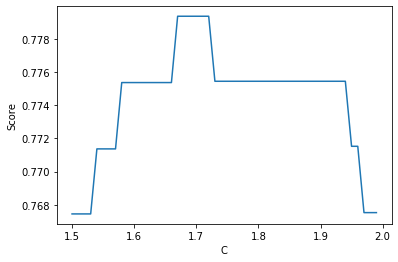

In [66]:
#test the accuracy when C is changed
cList=list(np.arange(1.5,2,0.01))
scoreList=[]
for i in cList:
    scoreList.append(anyKindSVM(thisKernel='rbf',thisC=i))
%matplotlib inline
plt.plot(cList,scoreList)
plt.xlabel('C')
plt.ylabel('Score')

test the trainTime again:

Text(0, 0.5, 'Score')

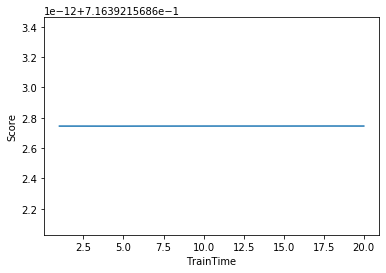

In [65]:
#test the accuracy when trainTime is changed
trainTime=list(range(1,21,1))
scoreList=[]
for i in trainTime:
    scoreList.append(anyKindSVM(trainTime=i))
%matplotlib inline
plt.plot(trainTime,scoreList)
plt.xlabel('TrainTime')
plt.ylabel('Score')

we can pick out the best use of rbf method:

In [70]:
def rbfSVMBestFit():
    testSize=50
    testRange=list(range(0,250,testSize))
    scoreList=[]
    for begin in testRange:
        X,y=loadDataSet("mostRelated20Features.csv",0,249,begin,begin+testSize)
        Xtest,ytest=loadDataSet("mostRelated20Features.csv",begin,begin+testSize)
        clf_rbf=SVC(kernel='rbf',C=1.7,gamma=0.04)
        clf_rbf.fit(X,y)
        score=clf_rbf.score(Xtest,ytest)
        scoreList.append(score)
    print(scoreList)

In [71]:
rbfSVMBestFit()

[0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.803921568627451, 0.7]


we want to know the predict result and the original result

In [114]:
part=5
testSize=50
begin=(part-1)*50
X,y=loadDataSet("mostRelated20Features.csv",0,249,begin,begin+testSize)
Xtest,ytest=loadDataSet("mostRelated20Features.csv",begin,begin+testSize)
clf_rbf=SVC(kernel='rbf',C=1.7,gamma=0.04)
clf_rbf.fit(X,y)
ypredict=clf_rbf.predict(Xtest)

In [115]:
size=np.size(ypredict)
print("real y,predict y")
for i in range(size):
    print(ytest[i],",",ypredict[i])

real y,predict y
1.0 , 1.0
0.0 , 0.0
1.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 0.0
0.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
0.0 , 1.0
0.0 , 0.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
0.0 , 1.0


In [116]:
def writeTestData(fileName,y):
    file=open(fileName,'w')
    index=250
    file.write("id,target\n")
    for i in y:
        file.write("%d,%d\n"%(index,i))
        index+=1
    file.close()
def loadTestData(fileName):
    dataMat=[]
    inFile=open(fileName)
    inFile.readline()
    for line in inFile.readlines():
        tempMat=[]
        lineArr=line.split(',')
        for element in lineArr[1:]:
            tempMat.append(float(element))
        dataMat.append(tempMat)
    return dataMat

In [117]:
XfinalTest=loadTestData('testSelect20features.csv')
yfinalTest=clf_rbf.predict(XfinalTest)
writeTestData("submissionSVM_part5.csv",yfinalTest)

we try again using just 10 features

In [118]:
testSize=50
testRange=list(range(0,250,testSize))
scoreList=[]
for begin in testRange:
    X,y=loadDataSet("mostRelated10Features.csv",0,249,begin,begin+testSize)
    Xtest,ytest=loadDataSet("mostRelated10Features.csv",begin,begin+testSize)
    clf_rbf=SVC(kernel='rbf',C=1.7,gamma=0.04)
    clf_rbf.fit(X,y)
    score=clf_rbf.score(Xtest,ytest)
    scoreList.append(score)
print(scoreList)

[0.7843137254901961, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.74]


In [129]:
part=1
testSize=50
begin=(part-1)*50
X,y=loadDataSet("mostRelated10Features.csv",0,249,begin,begin+testSize)
Xtest,ytest=loadDataSet("mostRelated10Features.csv",begin,begin+testSize)
clf_rbf=SVC(kernel='rbf',C=1.7,gamma=0.04)
clf_rbf.fit(X,y)
ypredict=clf_rbf.predict(Xtest)

In [130]:
size=np.size(ypredict)
print("real y,predict y")
for i in range(size):
    print(ytest[i],",",ypredict[i])

real y,predict y
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 0.0
1.0 , 1.0
1.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 0.0
1.0 , 1.0
1.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
0.0 , 0.0
1.0 , 0.0


In [131]:
XfinalTest=loadTestData('testSelect10features.csv')
yfinalTest=clf_rbf.predict(XfinalTest)
writeTestData("submissionSVM_part1_10features.csv",yfinalTest)

use 5 features now

In [135]:
testSize=50
testRange=list(range(0,250,testSize))
scoreList=[]
for begin in testRange:
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
    clf_rbf=SVC(kernel='rbf',C=1.7,gamma=0.04)
    clf_rbf.fit(X,y)
    score=clf_rbf.score(Xtest,ytest)
    scoreList.append(score)
print(scoreList)

[0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.72]


In [142]:
part=3
testSize=50
begin=(part-1)*50
X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
clf_rbf=SVC(kernel='rbf',C=1.7,gamma=0.04)
clf_rbf.fit(X,y)
ypredict=clf_rbf.predict(Xtest)

In [143]:
size=np.size(ypredict)
print("real y,predict y")
for i in range(size):
    print(ytest[i],",",ypredict[i])

real y,predict y
1.0 , 0.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 1.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 0.0
0.0 , 1.0
1.0 , 1.0
0.0 , 0.0


In [144]:
XfinalTest=loadTestData('testSelect5features.csv')
yfinalTest=clf_rbf.predict(XfinalTest)
writeTestData("submissionSVM_part3_5features.csv",yfinalTest)

choose the Parameters for the 5 features' model

In [145]:
def anyKindSVM_5(thisKernel='poly',thisDegree=3,thisGamma='auto',thisCoef0=1,thisC=1,trainTime=1):
    testSize=50
    testRange=list(range(0,250,testSize))
    count=0
    score=0
    for i in range(trainTime):
        for begin in testRange:
            count+=1
            X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
            Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
            clf_poly=SVC(kernel=thisKernel,C=thisC,degree=thisDegree,coef0=thisCoef0,gamma=thisGamma)
            clf_poly.fit(X,y)
            score+=clf_poly.score(Xtest,ytest)
    score=score/count
    return score

Text(0, 0.5, 'Score')

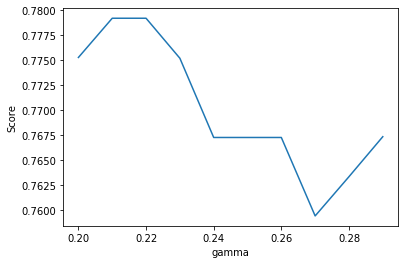

In [149]:
#test the accuracy when gamma is changed
gammaList=list(np.arange(0.2,0.3,0.01))
scoreList=[]
for i in gammaList:
    scoreList.append(anyKindSVM_5(thisGamma=i,thisKernel='rbf'))
%matplotlib inline
plt.plot(gammaList,scoreList)
plt.xlabel('gamma')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

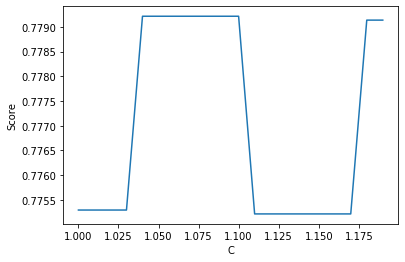

In [153]:
#test the accuracy when C is changed
cList=list(np.arange(1.0,1.2,0.01))
scoreList=[]
for i in cList:
    scoreList.append(anyKindSVM_5(thisKernel='rbf',thisC=i))
%matplotlib inline
plt.plot(cList,scoreList)
plt.xlabel('C')
plt.ylabel('Score')

In [156]:
testSize=50
testRange=list(range(0,250,testSize))
scoreList=[]
for begin in testRange:
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
    clf_rbf=SVC(kernel='rbf',C=1.050,gamma=0.22)
    clf_rbf.fit(X,y)
    score=clf_rbf.score(Xtest,ytest)
    scoreList.append(score)
print(scoreList)

[0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.8431372549019608, 0.68]


In [157]:
part=4
testSize=50
begin=(part-1)*50
X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
clf_rbf=SVC(kernel='rbf',C=1.050,gamma=0.22)
clf_rbf.fit(X,y)
ypredict=clf_rbf.predict(Xtest)
size=np.size(ypredict)
print("real y,predict y")
for i in range(size):
    print(ytest[i],",",ypredict[i])

real y,predict y
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
0.0 , 0.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 0.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0


In [158]:
XfinalTest=loadTestData('testSelect5features.csv')
yfinalTest=clf_rbf.predict(XfinalTest)
writeTestData("submissionSVM_part4_5features_v2.csv",yfinalTest)